In [17]:
# Created by Andrew A. Borkowski based on fastai course 2020

In [18]:
from fastai.vision.all import *
from fastai.vision.widgets import *

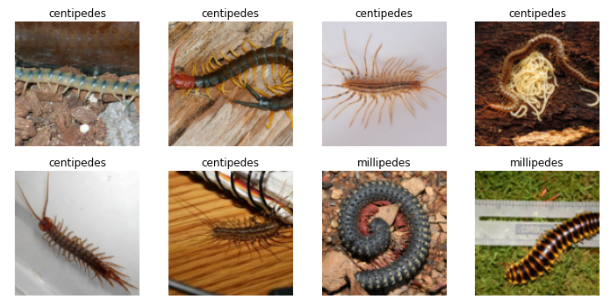

In [19]:
snakes_image = Image.open('images/worms.png')
snakes_image

# Centipedes vs Millipedes AI Classifier


Centipedes and millipedes are two creatures that one can encounter in the garden. Centipedes are beneficial to you because they feed on mites, insect larvae,  insects, baby snails, and slugs. Millipedes, on the other hand, can be harmful and feed on plant roots, germinating seeds, and seedlings. Therefore it is beneficial to any gardener to be able to distinguish between the two.

We used AI to help us do precisely that!


In [20]:
path=Path()
learn_inf = load_learner(path/'export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()


In [21]:
def on_click(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(256,256))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [22]:
btn_upload.observe(on_click, names='data')

In [23]:
VBox([widgets.Label('Upload the file with a worm image to make predictions.'), 
      btn_upload, out_pl, lbl_pred])